In [1]:
import pandas as pd
import shapely.wkb
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point



In [2]:
data_50001 = pd.read_parquet("../base.data/50001.parquet")
data_50001



,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,05001,05,001,MEDELLÍN,05001,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x8e\x04...


In [3]:
wkb_data_med = data_50001.iloc[0,5]

In [4]:
wkb_data_med

b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x8e\x04\x00\x00e\xfd\xa8~\xcc\xeaR\xc0K\xf8\xf1\x0c$~\x19@B\xca4\x9f\xd5\xeaR\xc0w\x9c\xd3\x0ez~\x19@\xf5H^^\xdf\xeaR\xc0\x03\x05@\xaa\x9b~\x19@\x82\xa5\xe9\x02\xea\xeaR\xc0{3\x0cH\x90~\x19@\xd6*\x0b\x03\xef\xeaR\xc0\xe3\x91\xf0\x18y~\x19@cf%\x01\xf8\xeaR\xc0+VS\x01\x13~\x19@\x12@+B\x07\xebR\xc0\x97\xb3\x86q\x88}\x19@?\\v\xde\x1f\xebR\xc07[j\x10(}\x19@@*#\x00(\xebR\xc0\x07v\\\xb0\xfb|\x19@\xc7y\x80\xa0<\xebR\xc0\x97\xe5\x0c\x88\xba|\x19@\xb7^\xf2#D\xebR\xc0/\x8d,a\xb9|\x19@\xc3\xa5uDS\xebR\xc0S\xf1"\xd4\x8b|\x19@js)b\\\xebR\xc0\xbb\x96\xbe\xafH|\x19@w\xe3\xe7\x03e\xebR\xc07\xd87\x11\xac{\x19@\xb6\xadE"l\xebR\xc0\x1b\xf7\x90\xca\xf6z\x19@\xe2\x178\x82o\xebR\xc0_\xe8(\xf3\xcez\x19@\tn\x1c\xc5z\xebR\xc07\xdf\xea\xc9\x94z\x19@\xb8;\x97\x81\x81\xebR\xc0\x1b\xceq\x99\x93z\x19@zs\xbf\xa3\x83\xebR\xc0\xef\x08E\xffsz\x19@\x0f\xb0\xccD\x99\xebR\xc0\xa7\\f\xbf\x8bz\x19@\xb7\xc3MC\xbd\xebR\xc0\xe7V\xb5b\x87z\x19@+\xcfr"\xdf\xebR\xc0\xf7d\x05\x87cz\x19@\xd1\x0

In [5]:
geometry_med = shapely.wkb.loads(wkb_data_med)

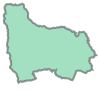

In [6]:
geometry_med

In [7]:
print(type(geometry_med))

<class 'shapely.geometry.polygon.Polygon'>


In [8]:
gdf = gpd.GeoDataFrame([1], geometry=[geometry_med], crs="EPSG:4326")

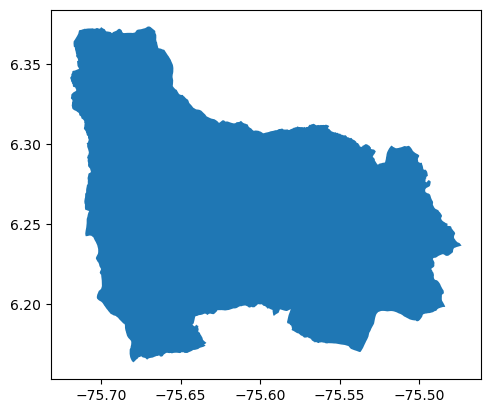

In [9]:
gdf.plot()
plt.show()

In [43]:
barrios = pd.read_parquet("../base.data/medellin_neighborhoods.parquet")
barrios_p = pd.read_parquet("../base.data/datos_por_comuna.parquet")




In [44]:
barrios['geometry'] = barrios['geometry'].apply(shapely.wkb.loads)
barrios_p['points'] = barrios_p['points'].apply(shapely.wkb.loads)
gdf_comunas = gpd.GeoDataFrame(barrios, geometry='geometry', crs="EPSG:4326")
gdf_comunas_p = gpd.GeoDataFrame(barrios_p, geometry='points', crs="EPSG:4326")


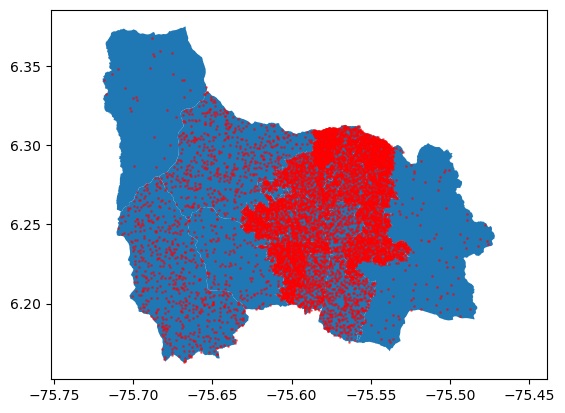

In [45]:
fig, ax = plt.subplots()

# gdf_comunas.plot(ax=ax, color='blue', alpha=0.5)
gdf_comunas.plot(ax=ax)
gdf_comunas_p.plot(ax=ax, color='red', alpha=0.5, markersize=1)
plt.axis('equal')  # Asegura que los ejes x e y tengan la misma escala
plt.show()

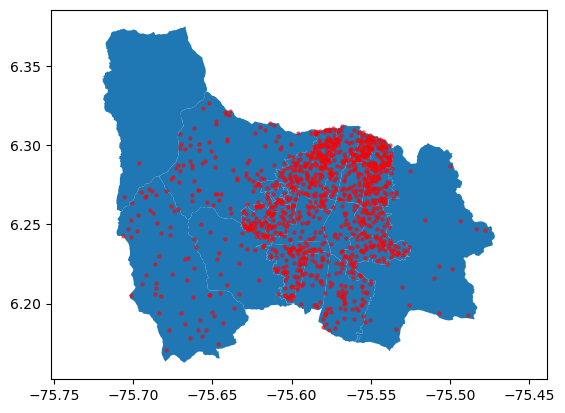

In [42]:
fig, ax = plt.subplots()

# gdf_comunas.plot(ax=ax, color='blue', alpha=0.5)
gdf_comunas.plot(ax=ax)
gdf_comunas_p.plot(ax=ax, color='red', alpha=0.5, markersize=5)
plt.axis('equal')  # Asegura que los ejes x e y tengan la misma escala
plt.show()

In [15]:
def generate_random_point_within_polygon(polygon):
    min_x, min_y, max_x, max_y = polygon.bounds
    while True:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if polygon.contains(random_point):
            return random_point

In [16]:
random_point = generate_random_point_within_polygon(geometry_med)

In [21]:
gdf_point = gpd.GeoDataFrame([1], geometry=[random_point], crs="EPSG:4326")

In [22]:
for idx, row in gdf_comunas.iterrows():
    if row['geometry'].contains(random_point):
        print(f"El punto aleatorio está en {row['NOMBRE']}")
        break

El punto aleatorio está en CORREGIMIENTO DE SAN ANTONIO DE PRADO


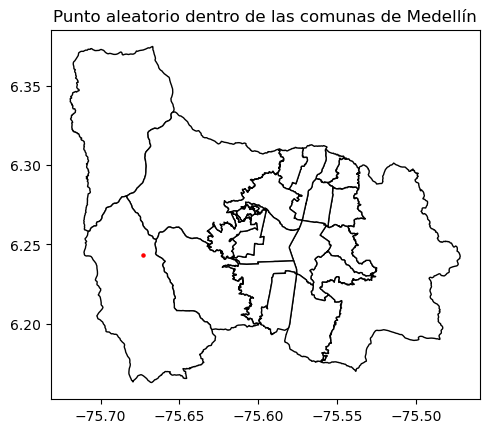

In [23]:
base = gdf_comunas.plot(color='white', edgecolor='black')
gdf_point.plot(ax=base, marker='o', color='red', markersize=5)
plt.title("Punto aleatorio dentro de las comunas de Medellín")
plt.show()

In [24]:
# shapes = list(map(shapely.wkb.loads, barrios["geometry"]))
# barrios["shapes"] = shapes

In [25]:
# type(barrios["shapes"][0])

In [26]:
# barrios_map = []
# for shape in shapes:
#     gdf = gpd.GeoDataFrame([1], geometry=[shape], crs="EPSG:4326")
#     barrios_map.append(gdf)

In [27]:
# barrios["barrios_map"] = barrios_map

In [28]:
# for map in range(len(barrios["barrios_map"])):
#     barrios["barrios_map"][map].plot()
#     plt.show(barrios["NOMBRE"][map])